## Win-stay, lose-shift with non-simultaneous events for the two companies 
- up
- down
- stay


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# Two competing companies A and B
# A initially dominates the market completely
# B enters the market 
# products are completely the same. Only difference they have is the product's price
fA = [1]  # market share of A (fraction of customers)
fB = [0] # market share of B (fraction of customers)
P_A = [10] #price of A product
P_B = [9]  #price of B product
cost = 0.001 # cost = constant 
Inc_A = [fA[0]*P_A[0]-cost] # Income per round of A. All customers initially use product A
Inc_B = [0] # Income per round of B. No customers use product B initially
count_zero_IncA = 0 # counting how many concecutive zero income values per round A has (max = 1)
count_zero_IncB = 0 # counting how many concecutive zero income values per round A has (max = 1)
actionA = 0 # initial action is to remain at the same value as before (2 possible actions 0, -1 and one acquired +1)
actionB = 0 # initial action is to remain at the same value as before (2 possible actions 0, -1 and one acquired +1)
dt = 0.51 # time step = market's senstitivity to price changes
vima = 1 # change of price per step (it is also the threshold because we cannot have zero price)
i = 0 # current step
# B enters the market and it gets attention

In [123]:
while count_zero_IncA < 1 and count_zero_IncB < 1: # if the income of a company is zero the company goes bankrupt
    dP = np.abs(P_A[i] - P_B[i]) # Price difference, which defines the flow of costumers
    # check whose price is smaller and how that affects their share of customers and their total capital
    if P_A[i] > P_B[i]:
        fA.append(fA[i] - fA[i] * dP * dt)
        fB.append(fB[i] + fA[i] * dP * dt)
        Inc_A.append(fA[i+1] * P_A[i] - cost)
        Inc_B.append(fB[i+1] * P_B[i] - cost)
    elif P_A[i] < P_B[i]:
        fA.append(fA[i] + fB[i] * dP * dt)
        fB.append(fB[i] - fB[i] * dP * dt)
        Inc_A.append(fA[i+1] * P_A[i] - cost)
        Inc_B.append(fB[i+1] * P_B[i] - cost)
    else:
        fA.append(fA[i])
        fB.append(fB[i])
        Inc_A.append(fA[i+1] * P_A[i] - cost)
        Inc_B.append(fB[i+1] * P_B[i] - cost)
        
    r1 = np.random.randint(6) # random event for company A
    r2 = np.random.randint(6) # random event for company B
    # random event for company A
    if r1 == 0: # A up
        actionA = 1
        P_A.append(P_A[i] + actionA)
        
    elif r1 == 1: # A constant
        actionA = 0
        P_A.append(P_A[i] + actionA) 
        
    elif r1 == 2: # A down
        actionA = -1
        if P_A[i] != 1:
            P_A.append(P_A[i] + actionA)
        else: 
            P_A.append(1)
            
    else: # No random event affects A
        if Inc_A[i+1] <= Inc_A[i]: #not winning? = change action
            if actionA != 0: # if you were either increasing or decreasing the prices and it didn't work then stop and stay consant for a step
                actionA = 0
                if P_A[i] > vima: #maximum absolut possible step
                    P_A.append(P_A[i] + actionA) # the size of the decrease of the price
                elif P_A[i] >= 1:
                    P_A.append(1) # Minimum price. You don't give the product for free
            elif actionA == 0:
                actionA = -vima
                if P_A[i] > vima: #maximum absolut possible step
                    P_A.append(P_A[i] + actionA) # the size of the decrease of the price
                elif P_A[i] >= 1:
                    P_A.append(1)        
        else: # not losing. keep it up
            if P_A[i] > vima: #maximum absolut possible step
                P_A.append(P_A[i] + actionA) # the size of the decrease of the price
            elif P_A[i] >= 1:
                P_A.append(1)
            
    # random event for company B
    if r2 == 0: # B up
        actionB = 1
        P_B.append(P_B[i] + actionB)
    
    elif r2 == 1: # B constant
        actionB = 0
        P_B.append(P_B[i] + actionB)
                    
    elif r2 == 2: # B down
        actionB = -1
        if P_B[i] != 1:
            P_B.append(P_B[i] + actionB)
        else: 
            P_B.append(1)
             
    else: # No random event affects B
        if Inc_B[i+1] <= Inc_B[i]: #not winning? = change action
            if actionB != 0: # if you were either increasing or decreasing the prices and it didn't work then stop and stay consant for a step
                actionB = 0
                if P_B[i] > vima: # maximum absolut possible step
                    P_B.append(P_B[i] + actionB) # the size of the decrease of the price
                elif P_B[i] >= 1:
                    P_B.append(1) # Minimum price. You don't give the product for free
            elif actionB == 0:
                actionB = -vima
                if P_B[i] > vima: # maximum absolut possible step
                    P_B.append(P_B[i] + actionB) # the size of the decrease of the price
                elif P_B[i] >= 1:
                    P_B.append(1)        
        else: # not losing. keep it up
            if P_B[i] > vima: # maximum absolut possible step
                P_B.append(P_B[i] + actionB) # the size of the decrease of the price
            elif P_B[i] >= 1:
                P_B.append(1)
    
    
    if r1 == 0 and r2 == 0:
        print(i)
    
    if Inc_A[i+1] <= 0:
        count_zero_IncA += 1 # count how many consecutive times the income was zero. The process stops with two consecutive times
    else:
        count_zero_IncA = 0 # if it is not consecutive then restart counting from zero
        
    if Inc_B[i+1] <= 0: 
        count_zero_IncB += 1
    else:
        count_zero_IncB = 0
    
    i += 1


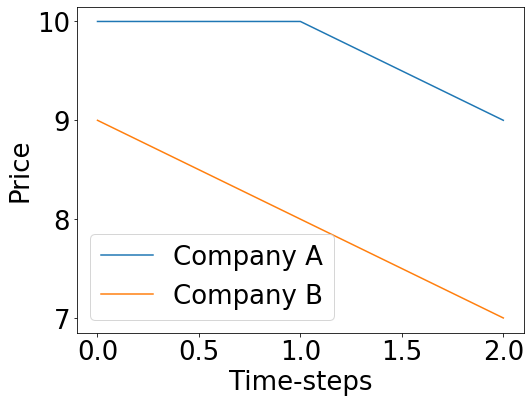

In [124]:
#plot product prices
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(P_A,label='Company A')
ax.plot(P_B,label='Company B')
ax.set_xlabel('Time-steps',fontsize=26)
ax.set_ylabel("Price",fontsize=26)
ax.tick_params(labelsize=26)
ax.legend(fontsize=26, loc='lower left')
#ax.set_ylim([0,10.07])
#ax.set_xlim([0,88]);
#fig.savefig('Figure 1 price part1 - LAST4SUB.pdf');

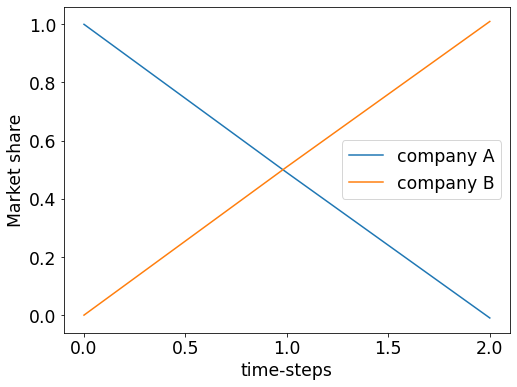

In [125]:
#plot market share
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(fA, label='company A')
ax.plot(fB, label='company B')
ax.set_xlabel('time-steps',fontsize='xx-large')
ax.set_ylabel("Market share",fontsize='xx-large')
ax.tick_params(labelsize='xx-large')
ax.legend(fontsize='xx-large')
#fig.savefig('W-S, L-S market share random uncorrelated.png');

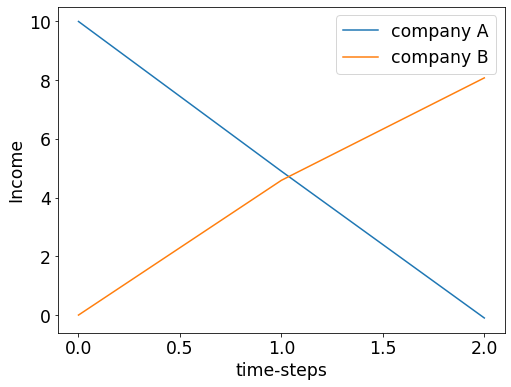

In [126]:
#plot income per round
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(Inc_A, label='company A')
ax.plot(Inc_B, label='company B')
ax.set_xlabel('time-steps',fontsize='xx-large')
ax.set_ylabel("Income",fontsize='xx-large')
ax.tick_params(labelsize='xx-large')
ax.legend(fontsize='xx-large')
#fig.savefig('W-S, L-S income random uncorrelated.png');

In [127]:
print(len(Inc_A))

print(Inc_A[-1])

print(len(Inc_B))

print(Inc_B[-1])

3
-0.09900000000000031
3
8.0774


In [128]:
Dif_Inc_A = []
Dif_Inc_B = []
trendA = []
trendB = []
for i in range(len(Inc_A)-1):
    Dif_Inc_A.append(Inc_A[i+1] - Inc_A[i])
    Dif_Inc_B.append(Inc_B[i+1] - Inc_B[i])
    if Dif_Inc_A[i] > 0:
        trendA.append(1)
    elif Dif_Inc_A[i] == 0: 
        trendA.append(0)
    else:
        trendA.append(-1)
    if Dif_Inc_B[i] > 0:
        trendB.append(1)
    elif Dif_Inc_B[i] == 0: 
        trendB.append(0)
    else:
        trendB.append(-1)   

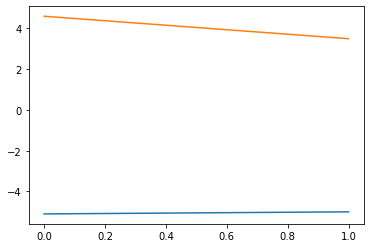

In [129]:
#Differences in Income per step
plt.clf()
plt.plot(Dif_Inc_A)
plt.plot(Dif_Inc_B);

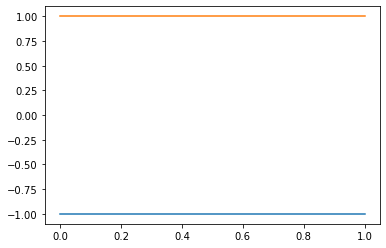

In [130]:
#Result of company strategies (win,lose or none) regarding profit
plt.clf()
plt.plot(trendA)
plt.plot(trendB);

In [131]:
common_growth = [i for i in range(len(Inc_A)-1) if trendA[i] == 1 and trendB[i] == 1]
peace = [i for i in range(len(Inc_A)-1) if (trendA[i] == 0 and trendB[i] == 0) or (trendA[i] == 1 and trendB[i] == 0) or (trendA[i] == 0 and trendB[i] == 1)]
war = [i for i in range(len(Inc_A)-1) if trendA[i] == -1 or trendB[i] == -1]
print(common_growth)
print(len(common_growth))
print('common growth (%) =',100*len(common_growth)/(len(Inc_A)-1),'\n')
print(peace)
print(len(peace))
print('peace (%) =',100*len(peace)/(len(Inc_A)-1),'\n')
print(war)
print(len(war))
print('war (%) =',100*len(war)/(len(Inc_A)-1),'\n')

[]
0
common growth (%) = 0.0 

[]
0
peace (%) = 0.0 

[0, 1]
2
war (%) = 100.0 



In [132]:
condition = []
for i in range(len(Inc_A)):
    if i in common_growth:
        condition.append(1)
    elif i in peace:
        condition.append(0)
    elif i in war:
        condition.append(-1)

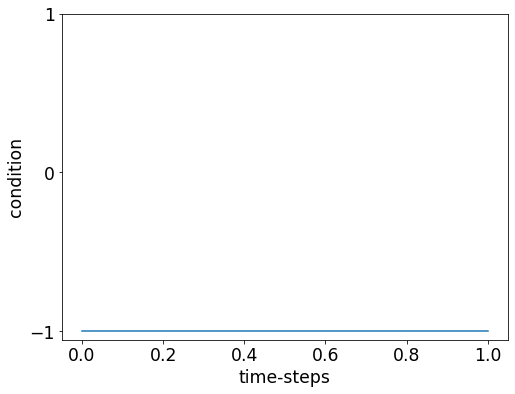

In [133]:
#plot condition
fig, ax = plt.subplots(figsize=[8,6])
plt.plot(condition);
ax.set_xlabel('time-steps',fontsize='xx-large')
ax.set_ylabel('condition',fontsize='xx-large')
ax.set_yticks([-1,0,1])
ax.tick_params(labelsize='xx-large')
#fig.savefig('W-S, L-S condition random uncorrelated.png');

## Repeat it with different probabilities of random events

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


common growth (%) = 0.0 

peace (%) = 0.0 

war (%) = 100.0 

time = 6


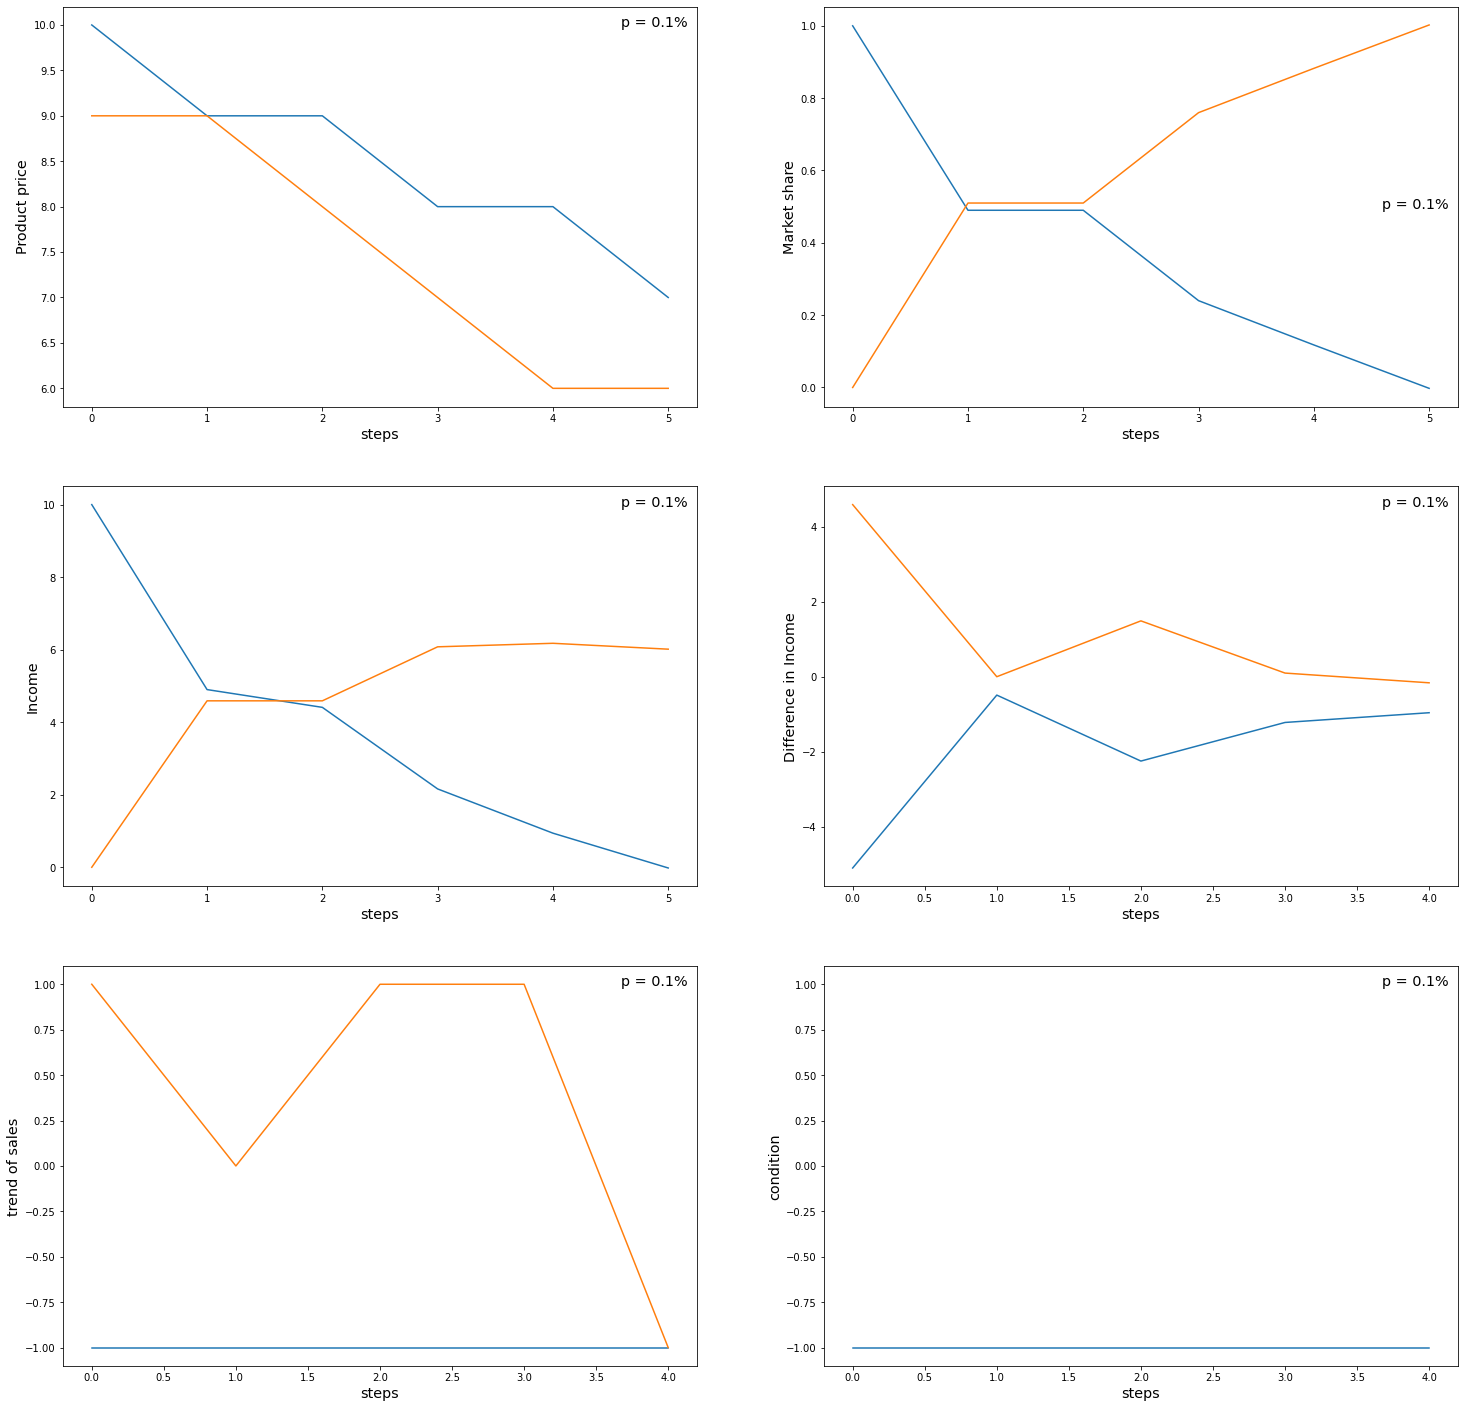

In [81]:
#plot product prices (p = 0.1%)
fig, ax = plt.subplots(3, 2, figsize=(25, 25))
ax = np.ravel(ax)

ax[0].plot(P_A)
ax[0].plot(P_B)
ax[0].set_xlabel('steps', fontsize='x-large')
ax[0].set_ylabel('Product price', fontsize='x-large')
ax[0].legend(title='p = 0.1%',frameon=False, title_fontsize = 'x-large');

ax[1].plot(fA)
ax[1].plot(fB)
ax[1].set_xlabel('steps', fontsize='x-large')
ax[1].set_ylabel('Market share', fontsize='x-large')
ax[1].legend(title='p = 0.1%',frameon=False, title_fontsize = 'x-large');

ax[2].plot(Inc_A)
ax[2].plot(Inc_B)
ax[2].set_xlabel('steps', fontsize='x-large')
ax[2].set_ylabel('Income', fontsize='x-large')
ax[2].legend(title='p = 0.1%',frameon=False, title_fontsize = 'x-large');

ax[3].plot(Dif_Inc_A)
ax[3].plot(Dif_Inc_B)
ax[3].set_xlabel('steps', fontsize='x-large')
ax[3].set_ylabel('Difference in Income', fontsize='x-large')
ax[3].legend(title='p = 0.1%',frameon=False, title_fontsize = 'x-large');

ax[4].plot(trendA)
ax[4].plot(trendB)
ax[4].set_xlabel('steps', fontsize='x-large')
ax[4].set_ylabel('trend of sales', fontsize='x-large')
ax[4].legend(title='p = 0.1%',frameon=False, title_fontsize = 'x-large');

ax[5].plot(condition)
ax[5].set_xlabel('steps', fontsize='x-large')
ax[5].set_ylabel('condition', fontsize='x-large')
ax[5].set_ylim(-1.1,1.1)
ax[5].legend(title='p = 0.1%',frameon=False, title_fontsize = 'x-large');

print('common growth (%) =',100*len(common_growth)/(len(Inc_A)-1),'\n')
print('peace (%) =',100*len(peace)/(len(Inc_A)-1),'\n')
print('war (%) =',100*len(war)/(len(Inc_A)-1),'\n')
print('time =',len(Inc_A))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


common growth (%) = 0.0 

peace (%) = 0.0 

war (%) = 100.0 

time = 6


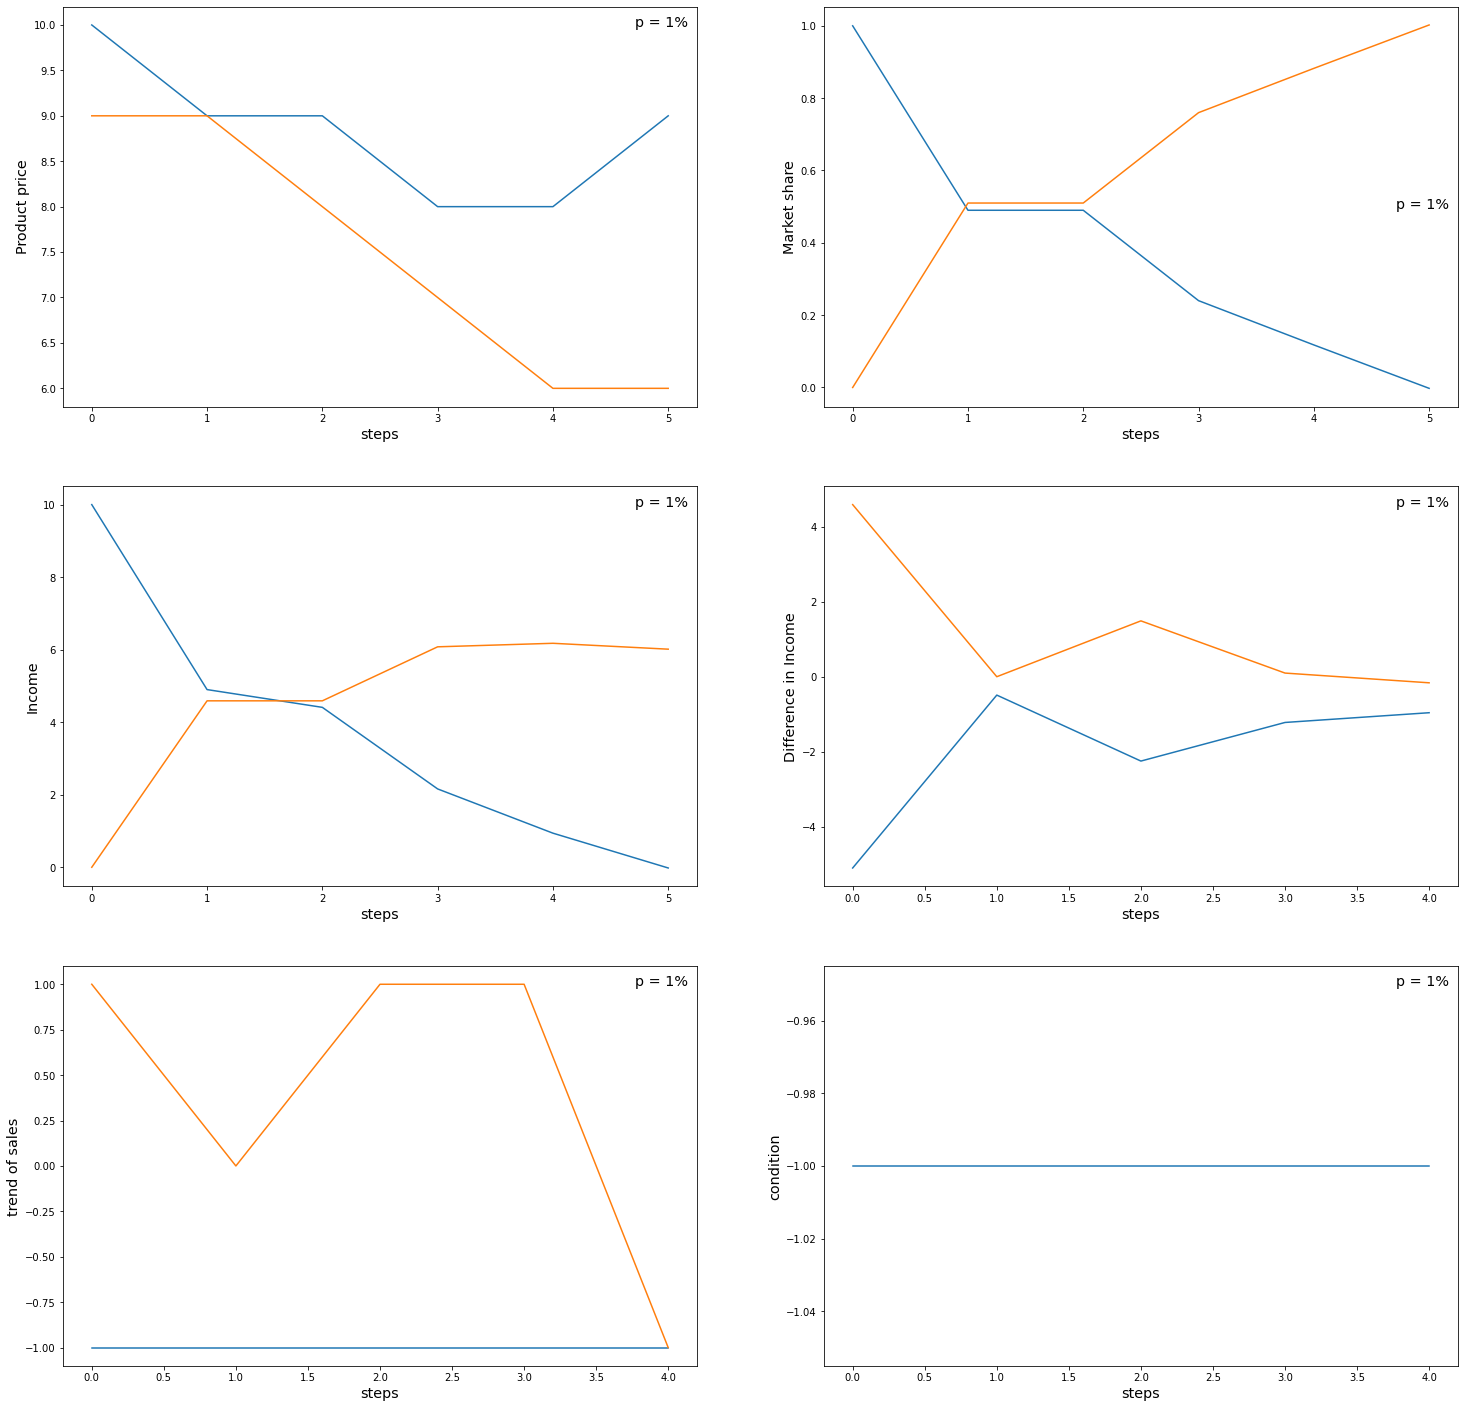

In [94]:
#plot product prices (p = 1%)
fig, ax = plt.subplots(3, 2, figsize=(25, 25))
ax = np.ravel(ax)

ax[0].plot(P_A)
ax[0].plot(P_B)
ax[0].set_xlabel('steps', fontsize='x-large')
ax[0].set_ylabel('Product price', fontsize='x-large')
ax[0].legend(title='p = 1%',frameon=False, title_fontsize = 'x-large');

ax[1].plot(fA)
ax[1].plot(fB)
ax[1].set_xlabel('steps', fontsize='x-large')
ax[1].set_ylabel('Market share', fontsize='x-large')
ax[1].legend(title='p = 1%',frameon=False, title_fontsize = 'x-large');

ax[2].plot(Inc_A)
ax[2].plot(Inc_B)
ax[2].set_xlabel('steps', fontsize='x-large')
ax[2].set_ylabel('Income', fontsize='x-large')
ax[2].legend(title='p = 1%',frameon=False, title_fontsize = 'x-large');

ax[3].plot(Dif_Inc_A)
ax[3].plot(Dif_Inc_B)
ax[3].set_xlabel('steps', fontsize='x-large')
ax[3].set_ylabel('Difference in Income', fontsize='x-large')
ax[3].legend(title='p = 1%',frameon=False, title_fontsize = 'x-large');

ax[4].plot(trendA)
ax[4].plot(trendB)
ax[4].set_xlabel('steps', fontsize='x-large')
ax[4].set_ylabel('trend of sales', fontsize='x-large')
ax[4].legend(title='p = 1%',frameon=False, title_fontsize = 'x-large');

ax[5].plot(condition)
ax[5].set_xlabel('steps', fontsize='x-large')
ax[5].set_ylabel('condition', fontsize='x-large')
ax[5].legend(title='p = 1%',frameon=False, title_fontsize = 'x-large');

print('common growth (%) =',100*len(common_growth)/(len(Inc_A)-1),'\n')
print('peace (%) =',100*len(peace)/(len(Inc_A)-1),'\n')
print('war (%) =',100*len(war)/(len(Inc_A)-1),'\n')
print('time =',len(Inc_A))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


common growth (%) = 0.0 

peace (%) = 0.0 

war (%) = 100.0 

time = 6


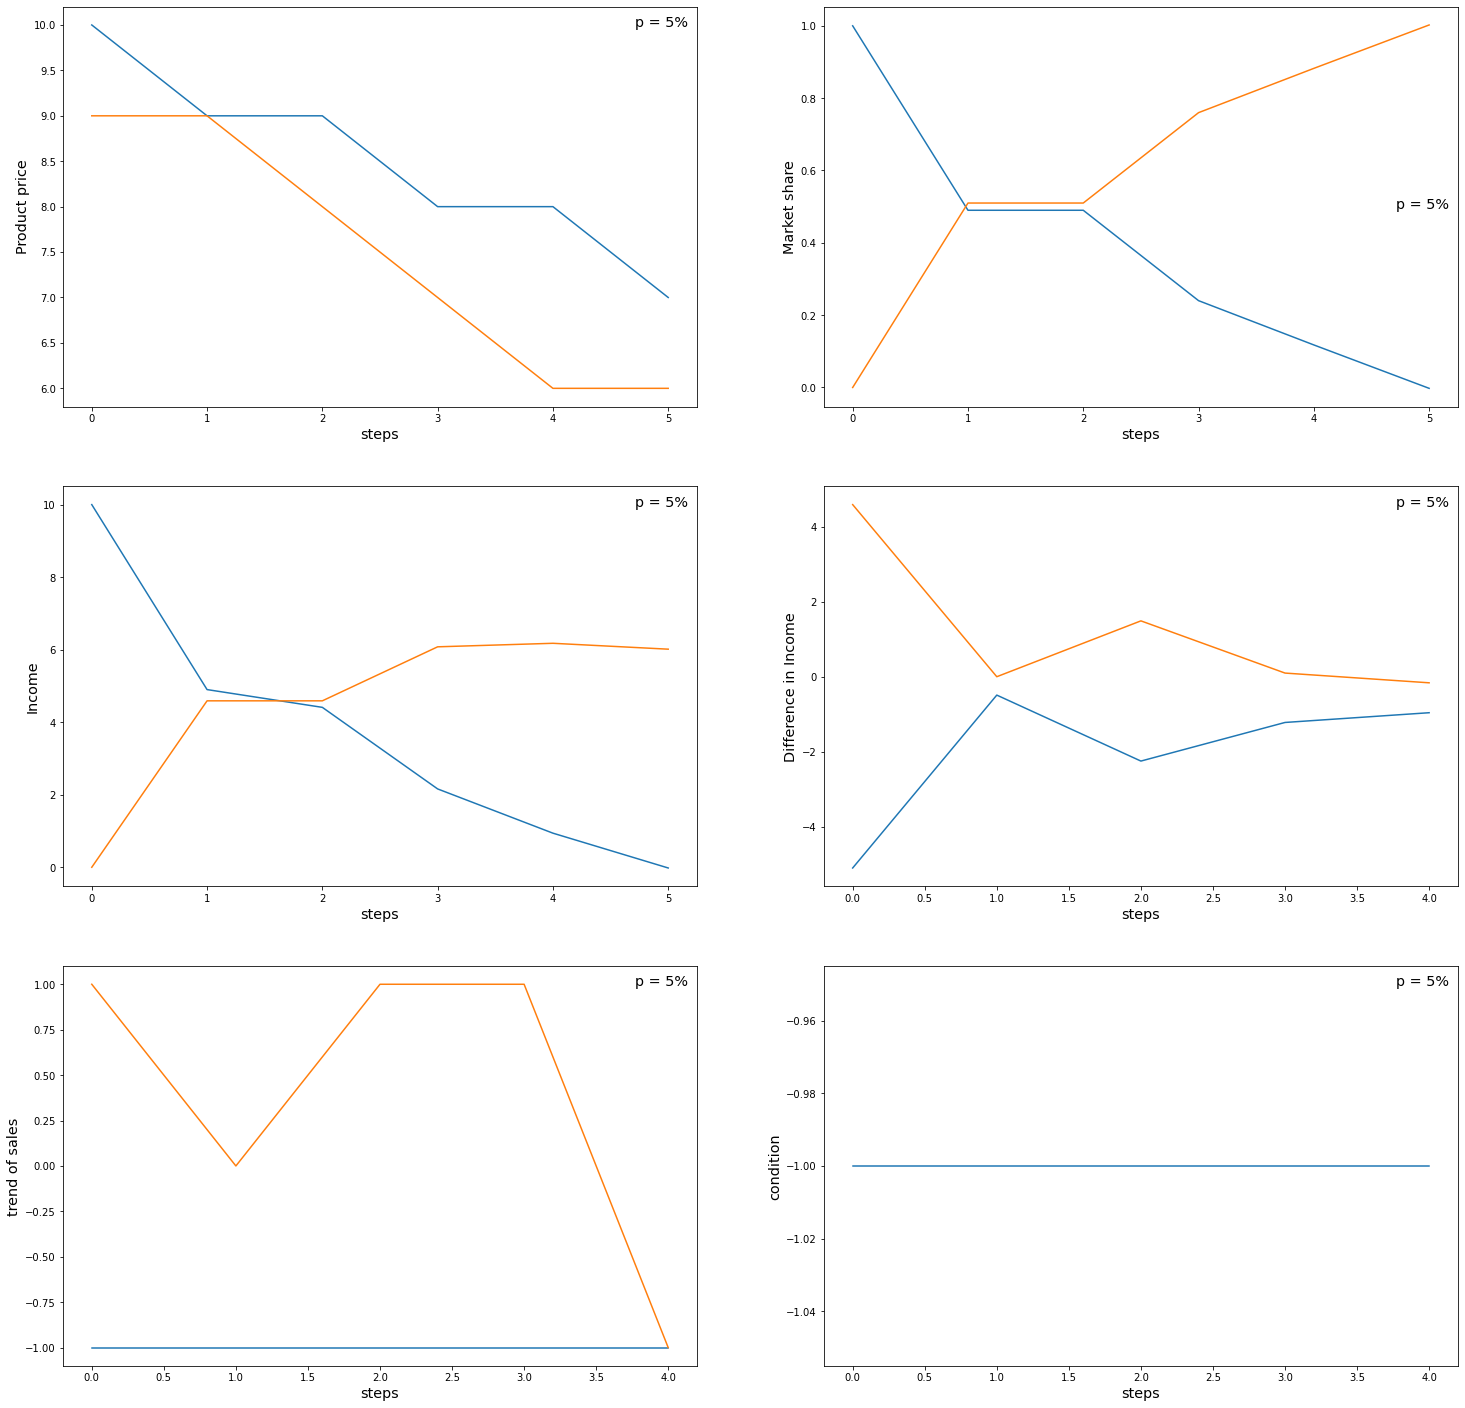

In [121]:
#plot product prices (p = 5%)
fig, ax = plt.subplots(3, 2, figsize=(25, 25))
ax = np.ravel(ax)

ax[0].plot(P_A)
ax[0].plot(P_B)
ax[0].set_xlabel('steps', fontsize='x-large')
ax[0].set_ylabel('Product price', fontsize='x-large')
ax[0].legend(title='p = 5%',frameon=False, title_fontsize = 'x-large');

ax[1].plot(fA)
ax[1].plot(fB)
ax[1].set_xlabel('steps', fontsize='x-large')
ax[1].set_ylabel('Market share', fontsize='x-large')
ax[1].legend(title='p = 5%',frameon=False, title_fontsize = 'x-large');

ax[2].plot(Inc_A)
ax[2].plot(Inc_B)
ax[2].set_xlabel('steps', fontsize='x-large')
ax[2].set_ylabel('Income', fontsize='x-large')
ax[2].legend(title='p = 5%',frameon=False, title_fontsize = 'x-large');

ax[3].plot(Dif_Inc_A)
ax[3].plot(Dif_Inc_B)
ax[3].set_xlabel('steps', fontsize='x-large')
ax[3].set_ylabel('Difference in Income', fontsize='x-large')
ax[3].legend(title='p = 5%',frameon=False, title_fontsize = 'x-large');

ax[4].plot(trendA)
ax[4].plot(trendB)
ax[4].set_xlabel('steps', fontsize='x-large')
ax[4].set_ylabel('trend of sales', fontsize='x-large')
ax[4].legend(title='p = 5%',frameon=False, title_fontsize = 'x-large');

ax[5].plot(condition)
ax[5].set_xlabel('steps', fontsize='x-large')
ax[5].set_ylabel('condition', fontsize='x-large')
ax[5].legend(title='p = 5%',frameon=False, title_fontsize = 'x-large');

print('common growth (%) =',100*len(common_growth)/(len(Inc_A)-1),'\n')
print('peace (%) =',100*len(peace)/(len(Inc_A)-1),'\n')
print('war (%) =',100*len(war)/(len(Inc_A)-1),'\n')
print('time =',len(Inc_A))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


common growth (%) = 0.0 

peace (%) = 0.0 

war (%) = 100.0 

time = 3


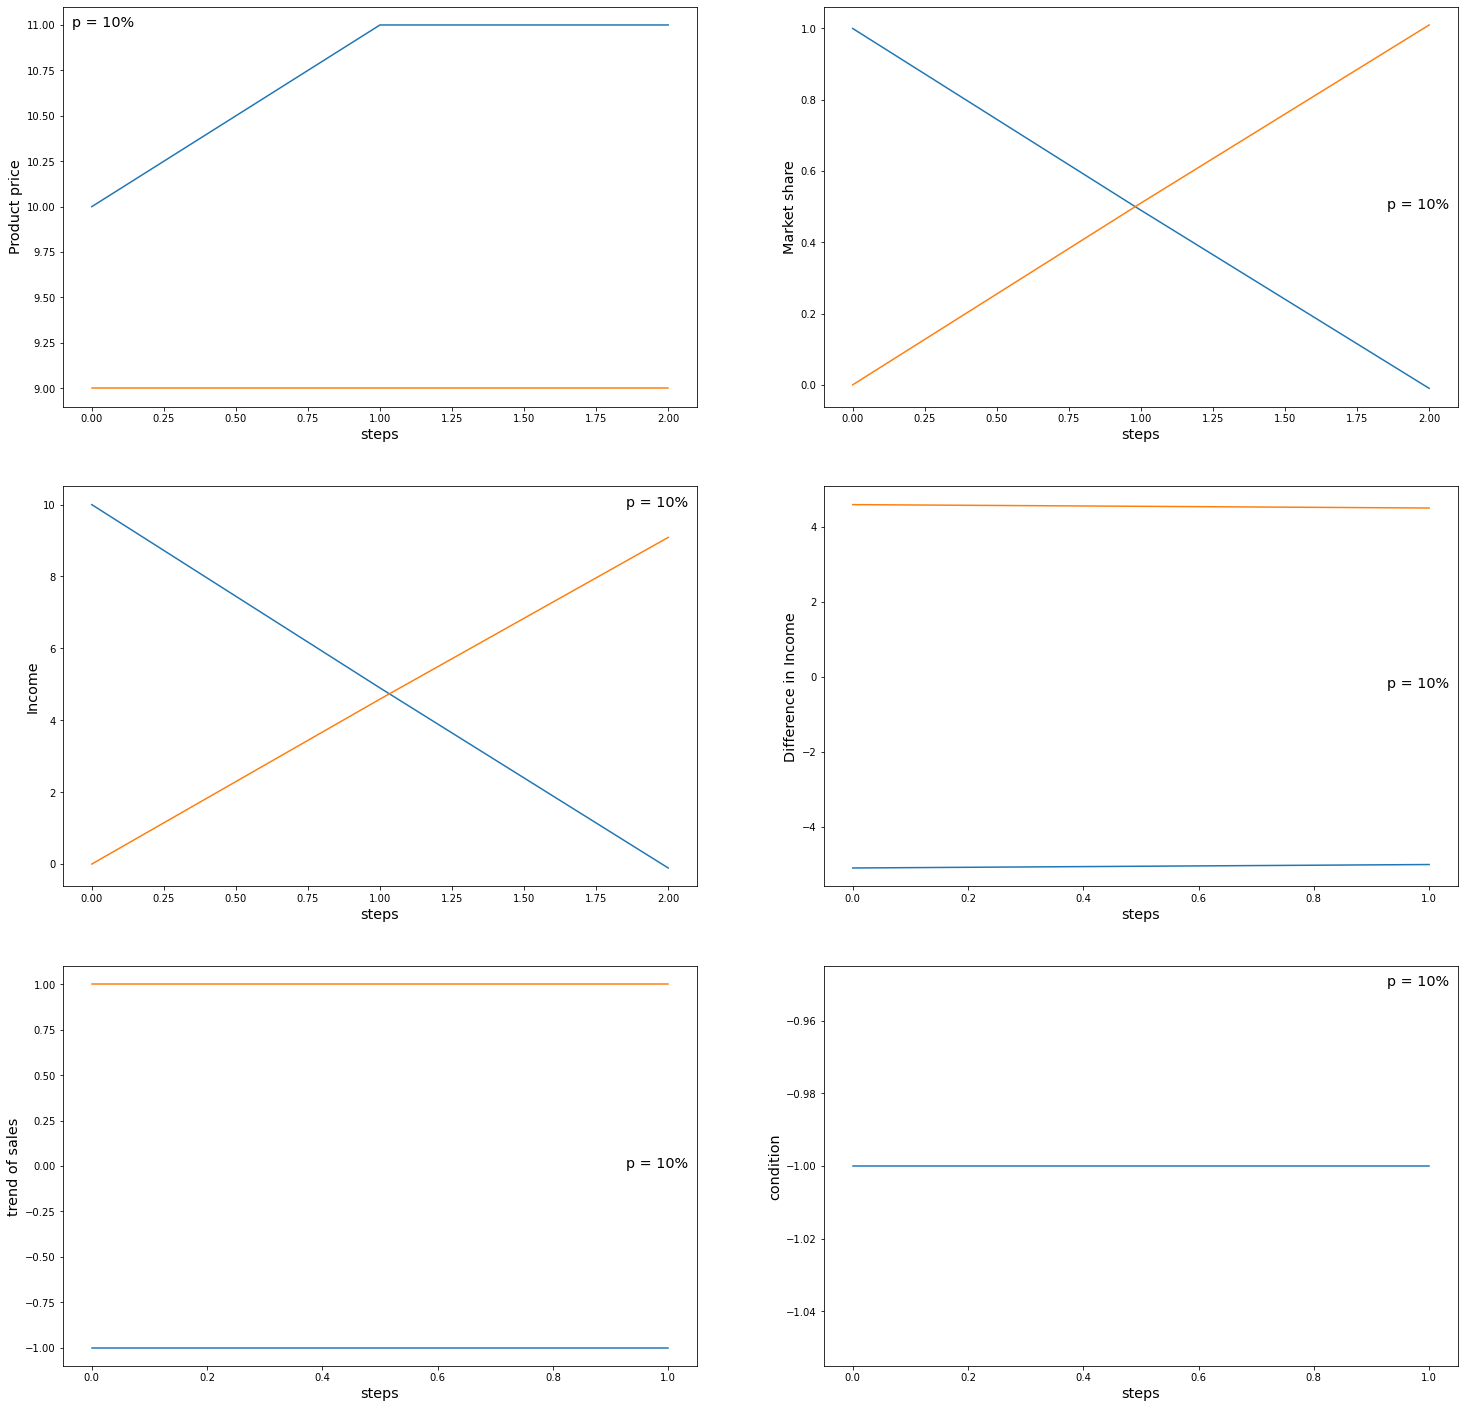

In [108]:
#plot product prices (p = 10%)
fig, ax = plt.subplots(3, 2, figsize=(25, 25))
ax = np.ravel(ax)

ax[0].plot(P_A)
ax[0].plot(P_B)
ax[0].set_xlabel('steps', fontsize='x-large')
ax[0].set_ylabel('Product price', fontsize='x-large')
ax[0].legend(title='p = 10%',frameon=False, title_fontsize = 'x-large');

ax[1].plot(fA)
ax[1].plot(fB)
ax[1].set_xlabel('steps', fontsize='x-large')
ax[1].set_ylabel('Market share', fontsize='x-large')
ax[1].legend(title='p = 10%',frameon=False, title_fontsize = 'x-large');

ax[2].plot(Inc_A)
ax[2].plot(Inc_B)
ax[2].set_xlabel('steps', fontsize='x-large')
ax[2].set_ylabel('Income', fontsize='x-large')
ax[2].legend(title='p = 10%',frameon=False, title_fontsize = 'x-large');

ax[3].plot(Dif_Inc_A)
ax[3].plot(Dif_Inc_B)
ax[3].set_xlabel('steps', fontsize='x-large')
ax[3].set_ylabel('Difference in Income', fontsize='x-large')
ax[3].legend(title='p = 10%',frameon=False, title_fontsize = 'x-large');

ax[4].plot(trendA)
ax[4].plot(trendB)
ax[4].set_xlabel('steps', fontsize='x-large')
ax[4].set_ylabel('trend of sales', fontsize='x-large')
ax[4].legend(title='p = 10%',frameon=False, title_fontsize = 'x-large');

ax[5].plot(condition)
ax[5].set_xlabel('steps', fontsize='x-large')
ax[5].set_ylabel('condition', fontsize='x-large')
ax[5].legend(title='p = 10%',frameon=False, title_fontsize = 'x-large');

print('common growth (%) =',100*len(common_growth)/(len(Inc_A)-1),'\n')
print('peace (%) =',100*len(peace)/(len(Inc_A)-1),'\n')
print('war (%) =',100*len(war)/(len(Inc_A)-1),'\n')
print('time =',len(Inc_A))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


common growth (%) = 0.0 

peace (%) = 0.0 

war (%) = 100.0 

time = 3


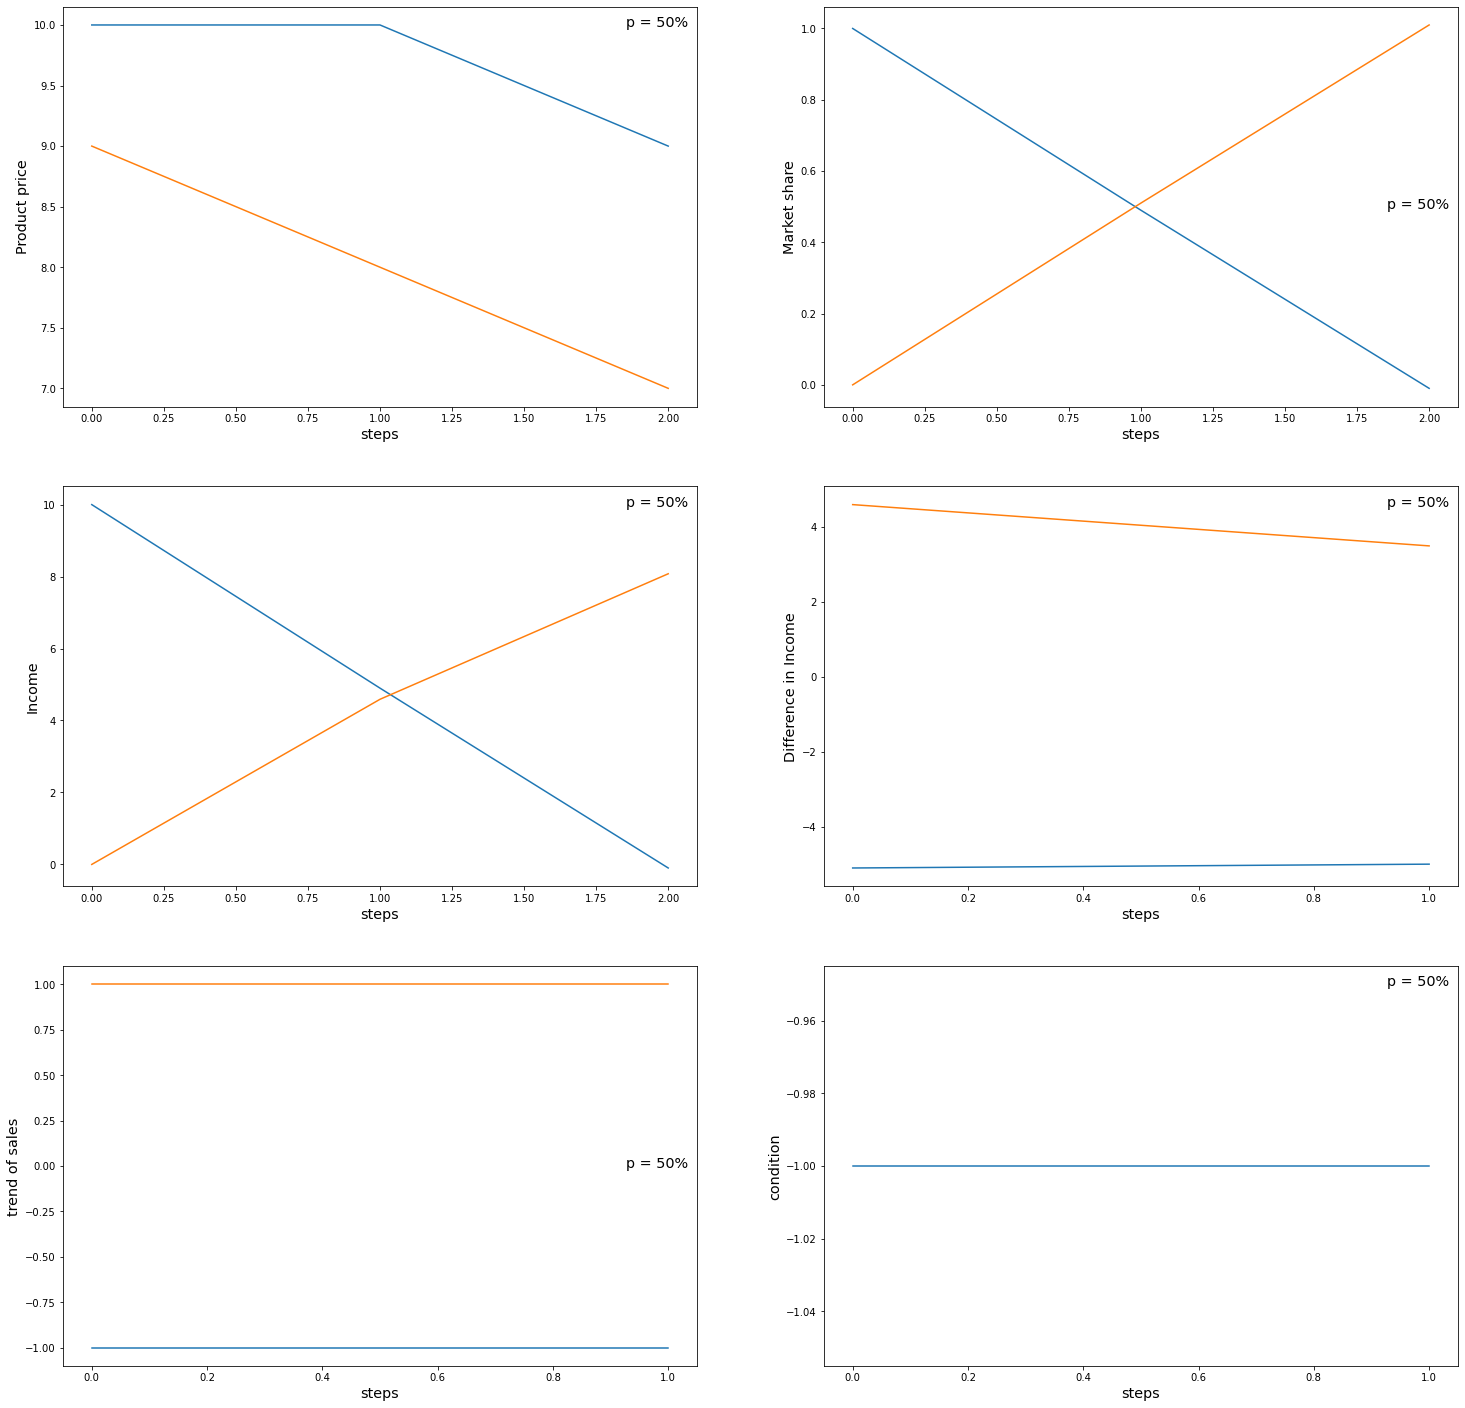

In [134]:
#plot product prices (p = 50%)
fig, ax = plt.subplots(3, 2, figsize=(25, 25))
ax = np.ravel(ax)

ax[0].plot(P_A)
ax[0].plot(P_B)
ax[0].set_xlabel('steps', fontsize='x-large')
ax[0].set_ylabel('Product price', fontsize='x-large')
ax[0].legend(title='p = 50%',frameon=False, title_fontsize = 'x-large');

ax[1].plot(fA)
ax[1].plot(fB)
ax[1].set_xlabel('steps', fontsize='x-large')
ax[1].set_ylabel('Market share', fontsize='x-large')
ax[1].legend(title='p = 50%',frameon=False, title_fontsize = 'x-large');

ax[2].plot(Inc_A)
ax[2].plot(Inc_B)
ax[2].set_xlabel('steps', fontsize='x-large')
ax[2].set_ylabel('Income', fontsize='x-large')
ax[2].legend(title='p = 50%',frameon=False, title_fontsize = 'x-large');

ax[3].plot(Dif_Inc_A)
ax[3].plot(Dif_Inc_B)
ax[3].set_xlabel('steps', fontsize='x-large')
ax[3].set_ylabel('Difference in Income', fontsize='x-large')
ax[3].legend(title='p = 50%',frameon=False, title_fontsize = 'x-large');

ax[4].plot(trendA)
ax[4].plot(trendB)
ax[4].set_xlabel('steps', fontsize='x-large')
ax[4].set_ylabel('trend of sales', fontsize='x-large')
ax[4].legend(title='p = 50%',frameon=False, title_fontsize = 'x-large');

ax[5].plot(condition)
ax[5].set_xlabel('steps', fontsize='x-large')
ax[5].set_ylabel('condition', fontsize='x-large')
ax[5].legend(title='p = 50%',frameon=False, title_fontsize = 'x-large');

print('common growth (%) =',100*len(common_growth)/(len(Inc_A)-1),'\n')
print('peace (%) =',100*len(peace)/(len(Inc_A)-1),'\n')
print('war (%) =',100*len(war)/(len(Inc_A)-1),'\n')
print('time =',len(Inc_A))

## Statistics

In [136]:
stats = 10000 # number of independent model execusions for statistics
num4p = [3000,300,100,60,30,15,10,6] # prob of random event = [0.001,0.01,0.03,0.05,0.1,0.2,0.3,0.5]
#creating the quantities of interest
time = np.zeros([len(num4p),stats])
Common_growth = np.zeros([len(num4p),stats])
Peace = np.zeros([len(num4p),stats])
War = np.zeros([len(num4p),stats])
Mean_IncA = np.zeros([len(num4p),stats])
Max_IncA = np.zeros([len(num4p),stats])
Mean_IncB = np.zeros([len(num4p),stats])
Max_IncB = np.zeros([len(num4p),stats])
who_dies = np.zeros([len(num4p),stats])
#repeating the process many times to get statistics on it
for o in range(len(num4p)):
    print(o)
    for k in range(stats):
        # Two competing companies A and B
        # A initially dominates the market completely
        # B enters the market 
        # products are completely the same. Only difference they have is the product
        fA = [1]  # market share of A (fraction of customers)
        fB = [0] # market share of B (fraction of customers)
        P_A = [10] #price of A product
        P_B = [9]  #price of B product
        cost = 0.001
        Inc_A = [fA[0]*P_A[0]-cost] # Income per round of A. All customers initially use product A
        Inc_B = [0] # Income per round of B. No customers use product B initially
        count_zero_IncA = 0 # counting how many concecutive zero income values per round A has (max = 1)
        count_zero_IncB = 0 # counting how many concecutive zero income values per round A has (max = 1)
        actionA = 0 # initial action is to remain at the same value as before (2 possible actions 0, -1 and one acquired +1)
        actionB = 0 # initial action is to remain at the same value as before (2 possible actions 0, -1 and one acquired +1)
        dt = 0.51 # time step = market's senstitivity to price changes
        vima = 1 # change of price per step (it is also the threshold because we cannot have zero price)
        i = 0 # current step
        # B enters the market and it gets attention
        # Do it stats amount of times to get statistics
        while count_zero_IncA < 1 and count_zero_IncB < 1: # if the income of a company is zero the company goes bankrupt
            dP = np.abs(P_A[i] - P_B[i]) # Price difference, which defines the flow of costumers
            # check whose price is smaller and how that affects their share of customers and their total capital
            if P_A[i] > P_B[i]:
                fA.append(fA[i] - fA[i] * dP * dt)
                fB.append(fB[i] + fA[i] * dP * dt)
                Inc_A.append(fA[i+1] * P_A[i] - cost)
                Inc_B.append(fB[i+1] * P_B[i] - cost)
            elif P_A[i] < P_B[i]:
                fA.append(fA[i] + fB[i] * dP * dt)
                fB.append(fB[i] - fB[i] * dP * dt)
                Inc_A.append(fA[i+1] * P_A[i] - cost)
                Inc_B.append(fB[i+1] * P_B[i] - cost)
            else:
                fA.append(fA[i])
                fB.append(fB[i])
                Inc_A.append(fA[i+1] * P_A[i] - cost)
                Inc_B.append(fB[i+1] * P_B[i] - cost)
                
                
            r1 = np.random.randint(num4p[o]) # random event for company A
            r2 = np.random.randint(num4p[o]) # random event for company B
            # random event for company A
            if r1 == 0: # A up
                actionA = 1
                P_A.append(P_A[i] + actionA)
                
            elif r1 == 1: # A constant
                actionA = 0
                P_A.append(P_A[i] + actionA) 
                
            elif r1 == 2: # A down
                actionA = -1
                if P_A[i] != 1:
                    P_A.append(P_A[i] + actionA)
                else: 
                    P_A.append(1)
                    
            else: # No random event affects A
                if Inc_A[i+1] <= Inc_A[i]: #not winning? = change action
                    if actionA != 0: # if you were either increasing or decreasing the prices and it didn't work then stop and stay consant for a step
                        actionA = 0
                        if P_A[i] > vima: #maximum absolut possible step
                            P_A.append(P_A[i] + actionA) # the size of the decrease of the price
                        elif P_A[i] >= 1:
                            P_A.append(1) # Minimum price. You don't give the product for free
                    elif actionA == 0:
                        actionA = -vima
                        if P_A[i] > vima: #maximum absolut possible step
                            P_A.append(P_A[i] + actionA) # the size of the decrease of the price
                        elif P_A[i] >= 1:
                            P_A.append(1)        
                else: # not losing? keep it up
                    if P_A[i] > vima: #maximum absolut possible step
                        P_A.append(P_A[i] + actionA) # the size of the decrease of the price
                    elif P_A[i] >= 1:
                        P_A.append(1)
                        
            # random event for company B
            if r2 == 0: # B up
                actionB = 1
                P_B.append(P_B[i] + actionB)
                
            elif r2 == 1: # B constant
                actionB = 0
                P_B.append(P_B[i] + actionB)
                
            elif r2 == 2: # B down
                actionB = -1
                if P_B[i] != 1:
                    P_B.append(P_B[i] + actionB)
                else: 
                    P_B.append(1)
                    
            else: # No random event affects B
                if Inc_B[i+1] <= Inc_B[i]: #not winning? = change action
                    if actionB != 0: # if you were either increasing or decreasing the prices and it didn't work then stop and stay consant for a step
                        actionB = 0
                        if P_B[i] > vima: # maximum absolut possible step
                            P_B.append(P_B[i] + actionB) # the size of the decrease of the price
                        elif P_B[i] >= 1:
                            P_B.append(1) # Minimum price. You don't give the product for free
                    elif actionB == 0:
                        actionB = -vima
                        if P_B[i] > vima: # maximum absolut possible step
                            P_B.append(P_B[i] + actionB) # the size of the decrease of the price
                        elif P_B[i] >= 1:
                            P_B.append(1)        
                else: # not losing? keep it up
                    if P_B[i] > vima: # maximum absolut possible step
                        P_B.append(P_B[i] + actionB) # the size of the decrease of the price
                    elif P_B[i] >= 1:
                        P_B.append(1)
                        
            if Inc_A[i+1] <= 0:
                count_zero_IncA += 1 # count how many consecutive times the income was zero. 
            else:
                count_zero_IncA = 0 # if it is not consecutive then restart counting from zero
                
            if Inc_B[i+1] <= 0: 
                count_zero_IncB += 1
            else:
                count_zero_IncB = 0
                
            i += 1
            
        # Calculate difference in income to see trends for each company
        Dif_Inc_A = []
        Dif_Inc_B = []
        trendA = []
        trendB = []
        for i in range(len(Inc_A)-1):
            Dif_Inc_A.append(Inc_A[i+1] - Inc_A[i])
            Dif_Inc_B.append(Inc_B[i+1] - Inc_B[i])
            if Dif_Inc_A[i] > 0:
                trendA.append(1)
            elif Dif_Inc_A[i] == 0: 
                trendA.append(0)
            else:
                trendA.append(-1)
            if Dif_Inc_B[i] > 0:
                trendB.append(1)
            elif Dif_Inc_B[i] == 0: 
                trendB.append(0)
            else:
                trendB.append(-1)
        
        #create and store the quantities of interest        
        common_growth = [i for i in range(len(Inc_A)-1) if trendA[i] == 1 and trendB[i] == 1]
        peace = [i for i in range(len(Inc_A)-1) if (trendA[i] == 0 and trendB[i] == 0) or (trendA[i] == 1 and trendB[i] == 0) or (trendA[i] == 0 and trendB[i] == 1)]
        war = [i for i in range(len(Inc_A)-1) if trendA[i] == -1 or trendB[i] == -1]
        
        Common_growth[o,k] = 100*len(common_growth)/(len(Inc_A)-1)
        Peace[o,k] = 100*len(peace)/(len(Inc_A)-1)
        War[o,k] = 100*len(war)/(len(Inc_A)-1)
        time[o,k] = len(Inc_A)
        Mean_IncA[o,k] = np.mean(Inc_A)
        Max_IncA[o,k] = np.max(Inc_A)
        Mean_IncB[o,k] = np.mean(Inc_B)
        Max_IncB[o,k] = np.max(Inc_B)
        if count_zero_IncA >= 1:
            who_dies[o,k] = 1
        else:
            who_dies[o,k] = -1
        
Mean_Inc = np.concatenate((Mean_IncA, Mean_IncB),axis=1) 
Max_Inc = np.concatenate((Max_IncA, Max_IncB),axis=1) 

0
1
2
3
4
5
6
7


In [137]:
print('probabilities =',[3 / x for x in num4p],'\n')

print('<time> =',np.mean(time,axis=1))
print('error =',np.std(time,axis=1)/np.sqrt(stats),'\n')

print('<common growth> (%) =',np.mean(Common_growth,axis=1))
print('error =',np.std(Common_growth,axis=1),'\n')

print('<peace> (%) =', np.mean(Peace,axis=1))
print('error =',np.std(Peace,axis=1),'\n')

print('<war> (%) =', np.mean(War,axis=1))
print('error =',np.std(War,axis=1),'\n')

print('<Mean income> =', np.mean(Mean_Inc,axis=1))
print('error =',np.std(Mean_Inc,axis=1)/np.sqrt(2*stats),'\n')

print('<Mean income A> =', np.mean(Mean_IncA,axis=1))
print('error =',np.std(Mean_IncA,axis=1)/np.sqrt(stats),'\n')

print('<Mean income B> =', np.mean(Mean_IncB,axis=1))
print('error =',np.std(Mean_IncB,axis=1)/np.sqrt(stats),'\n')

print('<Max income> =', np.mean(Max_Inc,axis=1))
print('error =',np.std(Max_Inc,axis=1)/np.sqrt(2*stats),'\n')

print('<Max income A> =', np.mean(Max_IncA,axis=1))
print('error =',np.std(Max_IncA,axis=1)/np.sqrt(stats),'\n')

print('<Max income B> =', np.mean(Max_IncB,axis=1))
print('error =',np.std(Max_IncB,axis=1)/np.sqrt(stats),'\n')

print('who dies =\n')
print('reps =', stats)
A_loses_percentage = []
for i in range(len(num4p)):
    print('p =', 3/num4p[i],'sum = ', sum(who_dies[i,:]))
    print('A loses =', np.count_nonzero(who_dies[i,:] == 1))
    print('B loses =', np.count_nonzero(who_dies[i,:] == -1))
    A_loses_percentage.append(np.count_nonzero(who_dies[i,:] == 1)/stats)

probabilities = [0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5] 

<time> = [80.9343 33.4638 21.574  19.8968 12.8224  8.7102  7.2166  6.2108]
error = [28.228711    4.9978849   1.59610779  1.03451625  0.364459    0.12468553
  0.06735242  0.03572305] 

<common growth> (%) = [0.         0.         0.03220084 0.07736339 0.19591065 0.40792629
 0.57963996 0.97523593]
error = [0.         0.         1.19325572 2.02375724 3.08308973 4.13231235
 4.40930537 5.02194984] 

<peace> (%) = [0.11140998 0.72190854 1.98075814 3.18757097 4.39836624 4.45589871
 4.26728047 4.91890028]
error = [ 3.3112072   8.01885127 12.31270329 14.88557524 14.79990151 10.94819252
  9.10208738  9.01296704] 

<war> (%) = [99.88859002 99.27809146 97.98704103 96.73506564 95.40572311 95.136175
 95.15307957 94.10586379]
error = [ 3.3112072   8.01885127 12.46277829 15.10815049 15.25309079 11.82503697
 10.32464113 10.66411177] 

<Mean income> = [4.1468224  4.11410992 4.06514928 4.01151111 3.99848258 4.110301
 4.24747715 4.42066901]
e

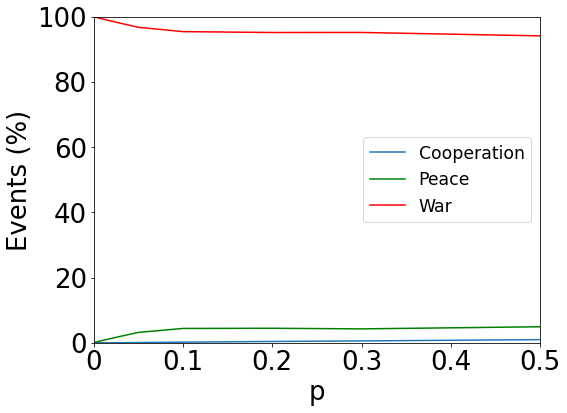

In [138]:
#plot WAR-PEACE-COMMON GROWTH with probability of event
P = [3 / x for x in num4p]

mean_com_gr = np.mean(Common_growth,axis=1)
mean_peace = np.mean(Peace,axis=1)
mean_war = np.mean(War,axis=1)


fig, ax = plt.subplots(figsize=[8,6])

ax.plot(P, mean_com_gr, label='Cooperation')
ax.plot(P, mean_peace, 'g', label='Peace')
ax.plot(P, mean_war, 'r', label='War')
ax.set_xlabel('p',fontsize=26)
ax.set_ylabel("Events (%)",fontsize=26)
ax.tick_params(labelsize=26)
ax.legend(fontsize='xx-large');
ax.set_ylim([0,100])
ax.set_xlim([0,0.5])
labels = ['0','0.1','0.2','0.3','0.4','0.5']
x = [0.0,0.1,0.2,0.3,0.4,0.5]
plt.xticks(x,labels);
#fig.savefig('Figure 3 events non-sim legend LAST4SUB.pdf');

In [139]:
P

[0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5]

In [140]:
mean_com_gr

array([0.        , 0.        , 0.03220084, 0.07736339, 0.19591065,
       0.40792629, 0.57963996, 0.97523593])

In [141]:
mean_com_gr

array([0.        , 0.        , 0.03220084, 0.07736339, 0.19591065,
       0.40792629, 0.57963996, 0.97523593])

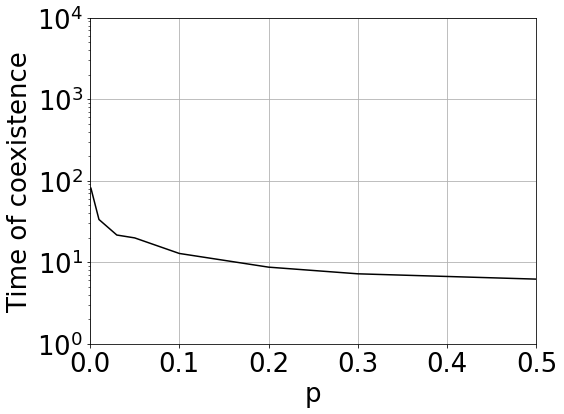

In [142]:
fig, ax = plt.subplots(figsize=[8,6])
mean_time = np.mean(time,axis=1)
ax.plot(P, mean_time, 'k', label='time of coexistence')
ax.set_xlabel('p',fontsize=26)
ax.set_ylabel("Time of coexistence",fontsize=26)
ax.set_yscale('log')
ax.tick_params(labelsize=26)
#ax.legend(fontsize='xx-large')
ax.grid()
ax.set_ylim([1,10**4])
ax.set_xlim([0,0.5]);
#fig.savefig('Time of coexistence Non-Sim.png');

In [143]:
mean_time

array([80.9343, 33.4638, 21.574 , 19.8968, 12.8224,  8.7102,  7.2166,
        6.2108])

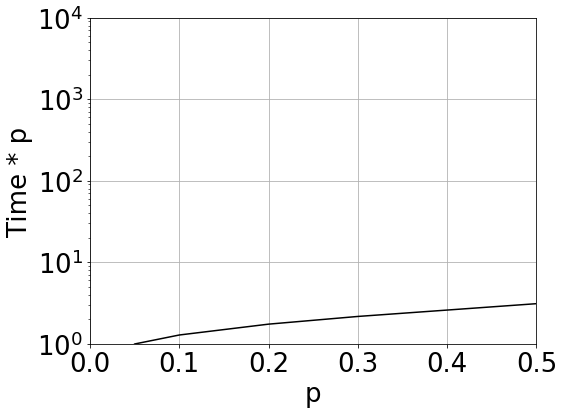

In [144]:
fig, ax = plt.subplots(figsize=[8,6])
mean_time = np.mean(time,axis=1)
ax.plot(P, mean_time*P, 'k', label='time of coexistence')
ax.set_xlabel('p',fontsize=26)
ax.set_ylabel("Time * p",fontsize=26)
ax.set_yscale('log')
ax.tick_params(labelsize=26)
#ax.legend(fontsize='xx-large')
ax.grid()
ax.set_ylim([1,10**4])
ax.set_xlim([0,0.5]);
#fig.savefig('Time of coexistence Non-Sim.png');

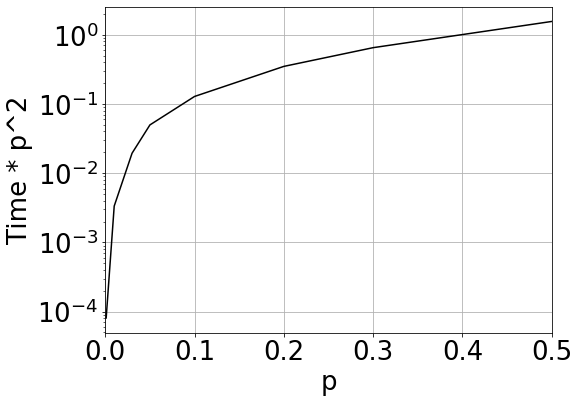

In [145]:
fig, ax = plt.subplots(figsize=[8,6])
mean_time = np.mean(time,axis=1)
ax.plot(P, mean_time*np.array(P)**2, 'k', label='time of coexistence')
ax.set_xlabel('p',fontsize=26)
ax.set_ylabel("Time * p^2",fontsize=26)
ax.set_yscale('log')
ax.tick_params(labelsize=26)
#ax.legend(fontsize='xx-large')
ax.grid()
#ax.set_ylim([1,10**4])
ax.set_xlim([0,0.5]);
#fig.savefig('Time of coexistence Non-Sim.png');

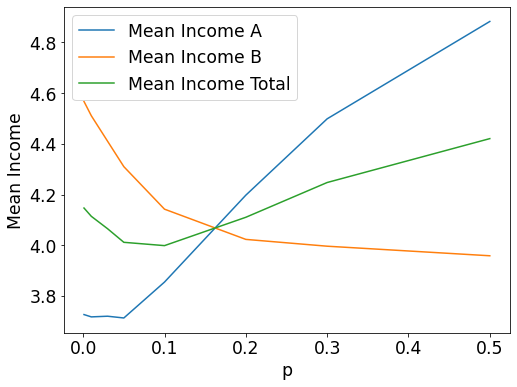

In [146]:
fig, ax = plt.subplots(figsize=[8,6])
mean_inc_tot = np.mean(Mean_Inc, axis=1)
mean_inc_A = np.mean(Mean_IncA, axis=1)
mean_inc_B = np.mean(Mean_IncB, axis=1)
ax.plot(P, mean_inc_A, label='Mean Income A')
ax.plot(P, mean_inc_B, label='Mean Income B')
ax.plot(P, mean_inc_tot, label='Mean Income Total')
ax.set_xlabel('p',fontsize='xx-large')
ax.set_ylabel("Mean Income",fontsize='xx-large')
ax.tick_params(labelsize='xx-large')
ax.legend(fontsize='xx-large');
#fig.savefig('Mean Income with p Non-Sim.png');

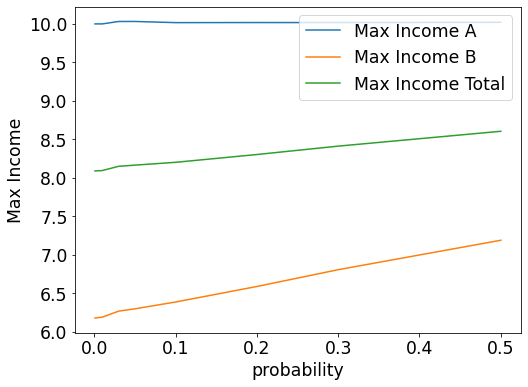

In [147]:
fig, ax = plt.subplots(figsize=[8,6])
max_inc_tot = np.mean(Max_Inc,axis=1)
max_inc_A = np.mean(Max_IncA,axis=1)
max_inc_B = np.mean(Max_IncB,axis=1)
ax.plot(P, max_inc_A, label='Max Income A')
ax.plot(P, max_inc_B, label='Max Income B')
ax.plot(P, max_inc_tot, label='Max Income Total')
ax.set_xlabel('probability',fontsize='xx-large')
ax.set_ylabel("Max Income",fontsize='xx-large')
ax.tick_params(labelsize='xx-large')
ax.legend(fontsize='xx-large');
#fig.savefig('Max Income with p Non-Sim.png');

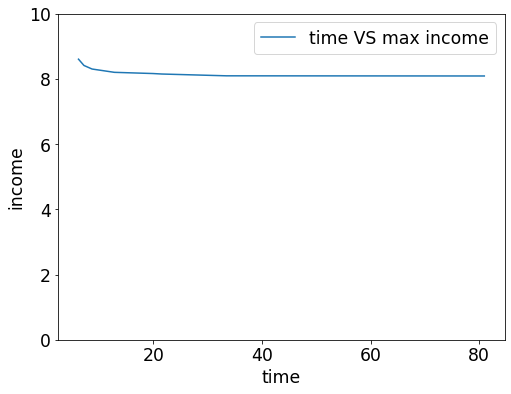

In [148]:
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(mean_time, max_inc_tot, label='time VS max income')
ax.set_xlabel('time',fontsize='xx-large')
ax.set_ylabel("income",fontsize='xx-large')
ax.tick_params(labelsize='xx-large')
ax.legend(fontsize='xx-large');
ax.set_ylim([0,10]);
#fig.savefig('time VS max income Non-Sim.png');

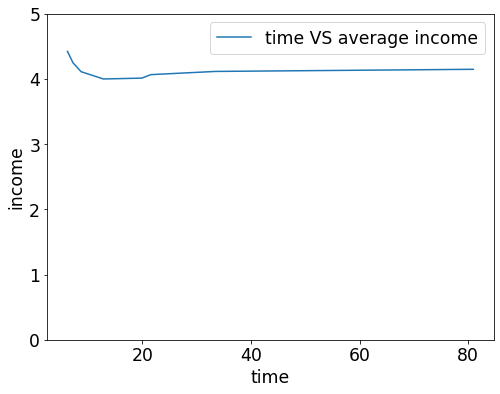

In [149]:
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(mean_time, mean_inc_tot,  label='time VS average income')
ax.set_xlabel('time',fontsize='xx-large')
ax.set_ylabel("income",fontsize='xx-large')
ax.tick_params(labelsize='xx-large')
ax.legend(fontsize='xx-large');
ax.set_ylim([0,5]);
#fig.savefig('time VS average income Non-Sim.png');

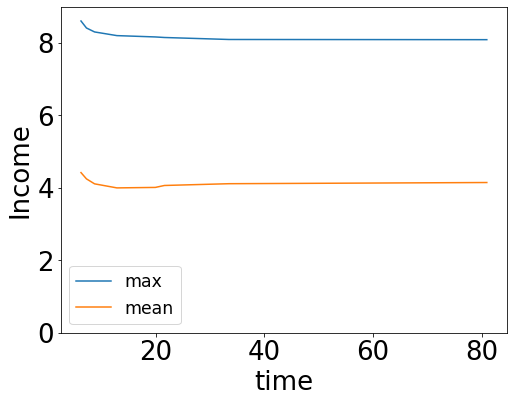

In [156]:
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(mean_time, max_inc_tot, label='max')
ax.plot(mean_time, mean_inc_tot,  label='mean')
ax.set_xlabel('time',fontsize=26)
ax.set_ylabel("Income",fontsize=26)
ax.tick_params(labelsize=26)
#ax.set_xlim([0,7200])
ax.set_ylim([0,9])
ax.legend(fontsize='xx-large');

In [157]:
max_inc_tot

array([8.08852797, 8.09370908, 8.14862804, 8.16379987, 8.20051758,
       8.30180464, 8.41084874, 8.60386596])

In [158]:
mean_inc_tot

array([4.1468224 , 4.11410992, 4.06514928, 4.01151111, 3.99848258,
       4.110301  , 4.24747715, 4.42066901])

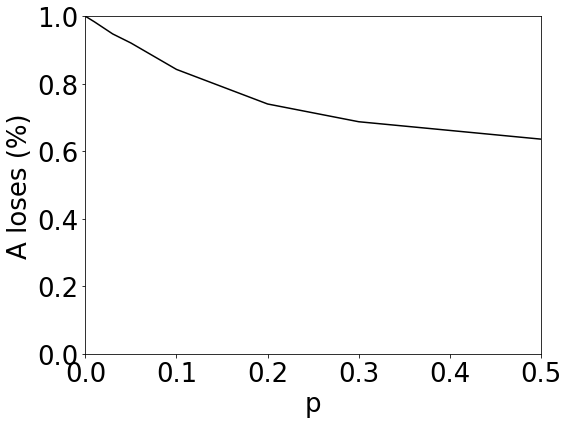

In [159]:
fig, ax = plt.subplots(figsize=[8,6])
mean_time = np.mean(time,axis=1)
ax.plot(P, A_loses_percentage, 'k', label='time of coexistence')
ax.set_xlabel('p',fontsize=26)
ax.set_ylabel("A loses (%)",fontsize=26)
ax.tick_params(labelsize=26)
#ax.legend(fontsize='xx-large')
ax.set_ylim([0,1])
ax.set_xlim([0,0.5])
fig.tight_layout();
#fig.savefig('Time of coexistence Non-Sim.png');

In [160]:
A_loses_percentage

[0.9989, 0.9839, 0.9481, 0.9212, 0.8429, 0.7404, 0.6878, 0.6362]

In [161]:
mean_inc_B

array([4.56721262, 4.510928  , 4.41037709, 4.31003254, 4.14229727,
       4.02304219, 3.99618586, 3.95843004])